In [89]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

__author__ = 'amanda'

# Load the face feature matrix
feature_arr = pd.read_csv('allFeatures.csv')
# Remove the irrelevant information
del feature_arr['dataset']
del feature_arr['img_num']


# Do PCA to decorrelate the data
explained_variance = 0.99
pca = PCA(n_components=explained_variance)
new_featureArray = pca.fit_transform(feature_arr)
print 'The number of PCs needed to retain %.3f variance is %d.' \
      % (explained_variance, new_featureArray.shape[1])

# Load the rating array
full_rating = pd.read_csv('rating_matrix.csv', delimiter='\t')
del full_rating['Unnamed: 0']

The number of PCs needed to retain 0.990 variance is 6.


In [99]:
correlation_list = np.zeros((full_rating.shape[0],1))
variance_score_list = np.zeros((full_rating.shape[0],1))
MSE_list = np.zeros((full_rating.shape[0],1))
coefficients_array = np.zeros((full_rating.shape[0],new_featureArray.shape[1]))
intercept_array = np.zeros((full_rating.shape[0], 1))

for i in range(full_rating.shape[0]):
    cur_subInd = i
    one_rating = full_rating.iloc[i, :][:, None]
    try:
        one_rating = [map(int, x) for x in one_rating]
    except ValueError:
        one_rating = np.ones((200,1))
    one_rating = [map(int, x) for x in one_rating]
    one_rating = np.array(one_rating)
    
    # Do linear regression on feature_arr and one_rating
    regr = linear_model.LinearRegression(fit_intercept=True)
    regr.fit(new_featureArray, one_rating)
    
    coefficients_array[i, :] = regr.coef_
    intercept_array[i] = regr.intercept_
    
    predicted_rating = regr.predict(new_featureArray)

    # Calculate the mean square error
    MSE = np.mean((predicted_rating - one_rating) ** 2)
    MSE_list[i] = MSE

    # Calculate how much variance is explained
    variance_score = regr.score(new_featureArray, one_rating)
    variance_score_list[i] = variance_score

    # Calculate the correlation between prediction and actual rating.
    cor = np.corrcoef(predicted_rating[:, 0], one_rating[:, 0])
    correlation_list[i] = cor[0, 1]

(1548, 200)

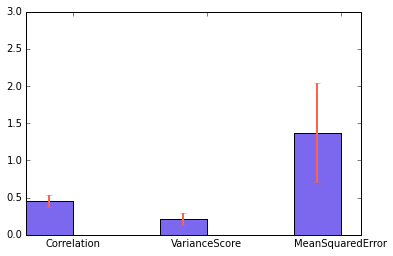

In [100]:
# Prepare data
cor_list = filter(lambda v: v==v, correlation_list)
cor_ave = np.mean(cor_list)
var_score_ave = np.mean(variance_score_list)
MSE_ave = np.mean(MSE_list)

y = np.array((cor_ave, var_score_ave, MSE_ave))
y_std = np.array((np.std(cor_list), np.std(variance_score_list), \
                  np.std(MSE_list)))

N = 3  # number of data entries
x = np.arange(N)  # the x locations for the groups
width = 0.35  # bar width


fig, ax = plt.subplots()

rect = ax.bar(x, y, # data
              width, # bar width
              color = 'MediumSlateBlue',  # bar color
               yerr = y_std, # data for error bars
               error_kw = {'ecolor':'Tomato',
                          'linewidth':2})

axes = plt.gca()
axes.set_ylim([0,3])  # y-axis bounds


# Add some text for labels.
ax.set_xticks(x+width)
ax.set_xticklabels(('Correlation','VarianceScore','MeanSquaredError'))
plt.show()
# def autolabel(rect):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, 
#            '%d' %int(height),
#            ha = 'center',
#            va = 'bottom')
    
# autolabel(rect)

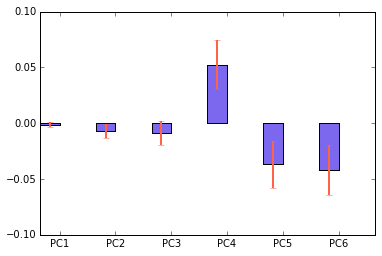

In [125]:
# Prepare data
# joint_array = np.concatenate((intercept_array,coefficients_array), axis=1)
# joint_mean = np.mean(joint_array, axis=0)
# joint_std = np.std(joint_array, axis=0)


# y = joint_mean
# y_std = joint_std

y = np.mean(coefficients_array,axis=0)
y_std = np.std(coefficients_array, axis=0)


N = y.shape[0]  # number of data entries
x = np.arange(N)  # the x locations for the groups
width = 0.35  # bar width


fig, ax = plt.subplots()

rect = ax.bar(x, y, # data
              width, # bar width
              color = 'MediumSlateBlue',  # bar color
               yerr = y_std, # data for error bars
               error_kw = {'ecolor':'Tomato',
                          'linewidth':2})

axes = plt.gca()
axes.set_ylim([-0.1,0.1])  # y-axis bounds


# Add some text for labels.
ax.set_xticks(x+width)
ax.set_xticklabels(('PC1','PC2','PC3','PC4','PC5','PC6'))
plt.show()

In [123]:
y

array([-0.00119446, -0.00679796, -0.00865479,  0.05256434, -0.03698898,
       -0.04198682])

(7,)

7